In [1]:
# Importing Libraries
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras import Sequential
from keras.layers import Input, Dense

In [2]:
# Importing Dataset
X, y = make_moons(
    n_samples = 500,
    noise = 0.5,
    random_state = 42
)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### GELU Activation Function
$$
\text{GELU}(z) = z \cdot \Phi(z)
$$
where Φ denotes the cumulative distribution function (CDF) of the standard normal distribution; in other words, Φ(z) is the probability that a random draw from 𝒩(0,1) falls below z.

1. Exhibits `non-monotonic` and `non-convex` behavior.
2. Favored in demanding architectures such as Transformers and large language models.
3. `Computationally heavier`; its accuracy gain may not always offset the extra cost.  
   A practical approximation `z*σ(1.702 z)`, with σ the sigmoid, runs markedly faster while retaining near-original performance.
4. Swish later streamlined this idea, trimming complexity and boosting speed.


In [3]:
# Model Building
model_gelu = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=10, activation='gelu'),
    Dense(units=5, activation='gelu'),
    Dense(units=1, activation = 'sigmoid')
])

model_gelu.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Model Training
model_gelu.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_gelu.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3200 - loss: 0.7748 - val_accuracy: 0.2200 - val_loss: 0.7835
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3650 - loss: 0.7534 - val_accuracy: 0.3000 - val_loss: 0.7584
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4675 - loss: 0.7323 - val_accuracy: 0.4700 - val_loss: 0.7368
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5650 - loss: 0.7133 - val_accuracy: 0.4800 - val_loss: 0.7167
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5825 - loss: 0.6948 - val_accuracy: 0.5700 - val_loss: 0.6969
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6125 - loss: 0.6765 - val_accuracy: 0.5900 - val_loss: 0.6779
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6225 - loss: 0.6587 - val_accuracy: 0.6600 - val_loss: 0.6586
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6725 - loss: 0.6403 - val_accuracy: 0.7600 - val_loss

---

#### Swish Activation Function
$$
\boxed{\text{Swish}_\beta(z)=z\cdot\sigma(\beta z)}
\quad\text{with}\quad
\sigma(x)=\frac{1}{1+e^{-x}},\;\beta=1.702
$$

β is a knob you can turn (or even let the network learn). Turning it up makes the curve bendier, helping the model fit better, but twist too far and it starts memorizing noise. In practice, Swish with this β runs faster and often beats plain GELU.

In [5]:
# Model Building
model_swish = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=10, activation='swish'),
    Dense(units=5, activation='swish'),
    Dense(units=1, activation = 'sigmoid')
])

model_swish.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Model Training
model_swish.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_swish.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6950 - loss: 0.6357 - val_accuracy: 0.7800 - val_loss: 0.6177
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7425 - loss: 0.6231 - val_accuracy: 0.8200 - val_loss: 0.6044
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7575 - loss: 0.6096 - val_accuracy: 0.8100 - val_loss: 0.5909
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7650 - loss: 0.5959 - val_accuracy: 0.8100 - val_loss: 0.5769
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7650 - loss: 0.5818 - val_accuracy: 0.8200 - val_loss: 0.5614
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7775 - loss: 0.5661 - val_accuracy: 0.8300 - val_loss: 0.5467
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7825 - loss: 0.5511 - val_accuracy: 0.8400 - val_loss: 0.5307
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7850 - loss: 0.5345 - val_accuracy: 0.8300 - val_loss

---

#### Mish Activation Function

$$
\mathrm{mish}(z) = z \cdot \tanh\!\bigl(\mathrm{softplus}(z)\bigr)
\quad\text{where}\quad
\mathrm{softplus}(z) = \ln\!\bigl(1 + e^{z}\bigr)
$$

It is a combination of GELU on the positive side and Swish on the negative side.

In [7]:
# Model Building
model_mish = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(units=10, activation='mish'),
    Dense(units=5, activation='mish'),
    Dense(units=1, activation = 'sigmoid')
])

model_mish.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91 (364.00 B)

 Trainable params: 91 (364.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Model Training
model_mish.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model_mish.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5125 - loss: 0.6901 - val_accuracy: 0.5900 - val_loss: 0.6649
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5700 - loss: 0.6767 - val_accuracy: 0.6600 - val_loss: 0.6507
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6175 - loss: 0.6636 - val_accuracy: 0.6900 - val_loss: 0.6350
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6450 - loss: 0.6498 - val_accuracy: 0.7300 - val_loss: 0.6184
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6825 - loss: 0.6358 - val_accuracy: 0.7500 - val_loss: 0.6013
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7100 - loss: 0.6214 - val_accuracy: 0.7700 - val_loss: 0.5865
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7325 - loss: 0.6076 - val_accuracy: 0.7900 - val_loss: 0.5688
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7375 - loss: 0.5934 - val_accuracy: 0.8100 - val_loss

23438/23438 ━━━━━━━━━━━━━━━━━━━━ 18s 763us/step
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step
23438/23438 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step


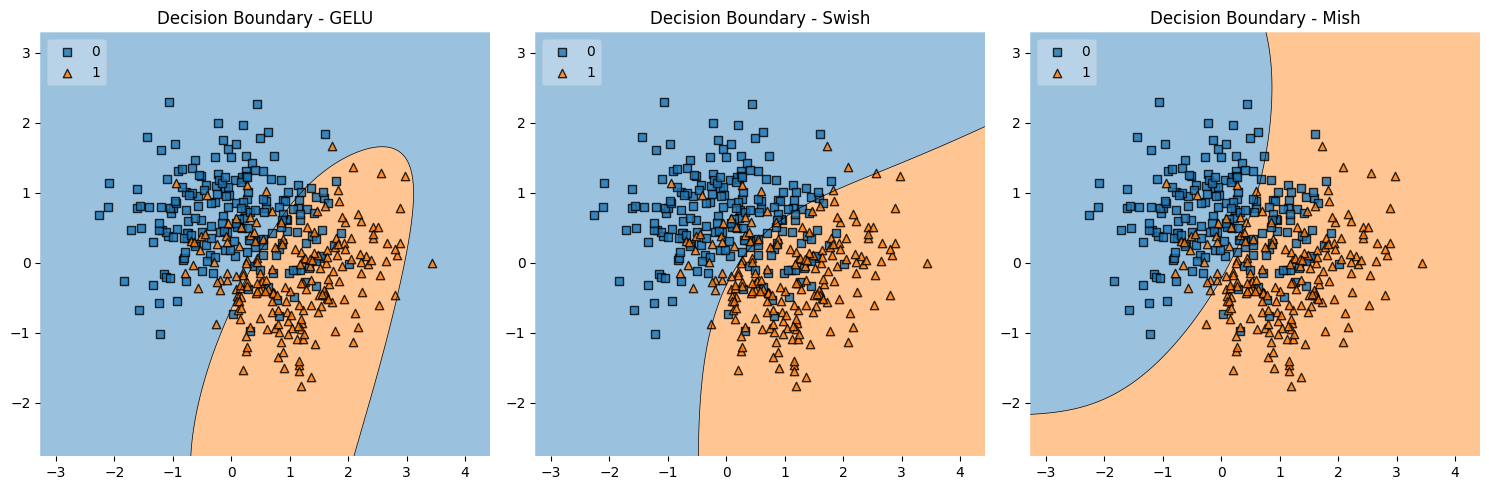

In [9]:
# Compare decision boundaries of GELU, Swish and Mish models
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

# Assume X_train, y_train are your 2D feature data and labels
# and you have three trained models: model_gelu, model_swish, model_mish

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for ax, model, name in zip(axes, [model_gelu, model_swish, model_mish], ['GELU', 'Swish', 'Mish']):
    plot_decision_regions(X_train, y_train, clf=model, ax=ax, legend=2)
    ax.set_title(f'Decision Boundary - {name}')

plt.tight_layout()
plt.show()


`GELU` – prone to overfitting on this dataset (small); best reserved for more complex tasks.  
`Swish` – achieved a clean generalization boost, lifting validation accuracy by 1 % while reducing cost complexity.  
`Mish` – offered a steadier generalization profile than GELU.